In [14]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import pandas as pd
import pickle
import sqlite3
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, TruncatedSVD

In [4]:
# Load data

articles1 = pd.read_csv("articles1.csv")
articles2 = pd.read_csv("articles2.csv")
articles3 = pd.read_csv("articles3.csv")
articles = pd.concat([articles1, articles2, articles3])

# This helps to cut down the volume of data I'm working with
articles_train, articles_test = train_test_split(articles, test_size=0.5)

uci = pd.read_csv("uci-news-aggregator.csv")
uci.columns = [k.lower() for k in uci.columns]

In [6]:
def get_pub_dict():
    pub_dict = {}

    for pub in set(articles_train.publication):
        pub_df = articles_train[articles_train.publication == pub]
        pub_data = zip(pub_df.date, pub_df.title, pub_df.content)
        pub_dict[pub] = pub_data
        
    return pub_dict    


def get_topics(model, feature_names, no_top_words):
    topics = []
    for _, topic in enumerate(model.components_):
        topics.append([(feature_names[i], np.round(lsa_cv.components_[_][i], 3)) for i in topic.argsort()[:-no_top_words-1:-1]])
    return topics




In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   min_df = 0.05,
                                   max_df = 0.6)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   min_df = 0.05,
                                   max_df = 0.6)

In [7]:
n_comp = 10
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

In [ ]:
example = articles.content
example = list(example)
import random
random.shuffle(example)

example2 = example[:1000]

In [58]:
num_top_words = 10
pub_dict = get_pub_dict()
publications = pub_dict.keys()

# topic_pub_dict = {}

# pub_articles = [k[2] for k in pub_dict[pub]]

cv_articles_data = count_vectorizer.fit_transform(example2)
tfidf_articles_data = tfidf_vectorizer.fit_transform(example2)

lsa_tfidf_articles_data = lsa_tfidf.fit_transform(tfidf_articles_data)
lsa_cv_articles_data = lsa_cv.fit_transform(cv_articles_data)
nmf_cv_articles_data = nmf_cv.fit_transform(cv_articles_data)

pub_lsa_tfidf = get_topics(lsa_tfidf, tfidf_vectorizer.get_feature_names(), num_top_words)
pub_lsa_cv    = get_topics(lsa_cv,    count_vectorizer.get_feature_names(), num_top_words)
pub_nmf_cv    = get_topics(nmf_cv,    count_vectorizer.get_feature_names(), num_top_words)

# topic_pub_dict[pub] = [pub_lsa_tfidf, pub_lsa_cv, pub_nmf_cv]
    
    
# pub_df = pd.DataFrame.from_dict(topic_pub_dict, orient="index")   
# pub_df.columns = ["lsa_tfidf", "lsa_cv", "nmf_cv"]

### TSNE: LSA CV

In [ ]:
km = KMeans(n_clusters=3)
clusts = km.fit_predict(lsa_cv_articles_data)

tsne_lsa_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_lsa_cv_ft = tsne.fit_transform(lsa_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_lsa_cv_ft[:, 0], tsne_lsa_cv_ft[:, 1], c=clusts, cmap=plt.cm.rainbow);
#plt.scatter(tsne_lsa_cv_ft[:,0], tsne_lsa_cv_ft[:,1], c=lsa_cv_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.555298
[t-SNE] Computed conditional probabilities in 0.076s
[t-SNE] Iteration 50: error = 62.9804001, gradient norm = 0.2176090 (50 iterations in 2.777s)
[t-SNE] Iteration 100: error = 62.2967339, gradient norm = 0.2058488 (50 iterations in 3.012s)
[t-SNE] Iteration 150: error = 62.2105751, gradient norm = 0.1998179 (50 iterations in 2.564s)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.555298
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 62.7420807, gradient norm = 0.2052388 (50 iterations in 2.459s)
[t-SNE] Iteration 100: error = 62.2125664, gradient norm = 0.2041713 (50 iterations in 2.372s)
[t-SNE] Iteration 150: error = 62.1636658, gradient norm = 0.2077501 (50 iterations in 2.450s)
[t-SNE] Iteration 200: error = 62.2033195, gradient norm = 0.2087450 (50 iterations in 2.311s)
[t-SNE] Iteration 250: error = 62.1807327, gradient norm = 0.2042345 (50 iterations in 2.198s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.180733
[t-SNE] Iteration 300: error = 0.9225651, gradient norm = 0.0011935 (50 iterations in 2.090s)
[t-SNE] Iteration 350: error = 0.8680274, gradient norm = 0.0003

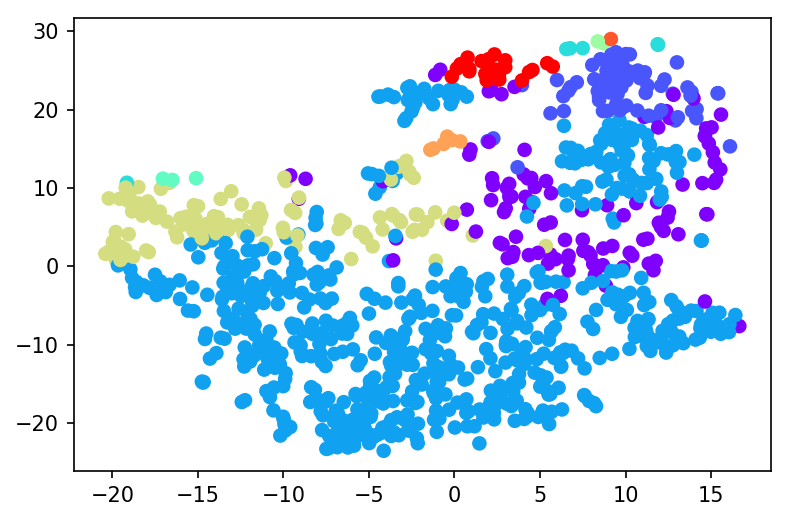

In [89]:
km = KMeans(n_clusters=10)
clusts = km.fit_predict(lsa_cv_articles_data)

tsne_lsa_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_lsa_cv_ft = tsne.fit_transform(lsa_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_lsa_cv_ft[:, 0], tsne_lsa_cv_ft[:, 1], c=clusts, cmap=plt.cm.rainbow);
#plt.scatter(tsne_lsa_cv_ft[:,0], tsne_lsa_cv_ft[:,1], c=lsa_cv_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.555298
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 62.8686066, gradient norm = 0.2188449 (50 iterations in 2.571s)
[t-SNE] Iteration 100: error = 62.4574471, gradient norm = 0.2064324 (50 iterations in 2.991s)
[t-SNE] Iteration 150: error = 62.1999588, gradient norm = 0.2136562 (50 iterations in 2.390s)
[t-SNE] Iteration 200: error = 62.2155991, gradient norm = 0.2120961 (50 iterations in 2.497s)
[t-SNE] Iteration 250: error = 62.1888580, gradient norm = 0.2031634 (50 iterations in 2.448s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.188858
[t-SNE] Iteration 300: error = 0.9725561, gradient norm = 0.0011676 (50 iterations in 1.985s)
[t-SNE] Iteration 350: error = 0.9098258, gradient norm = 0.0005

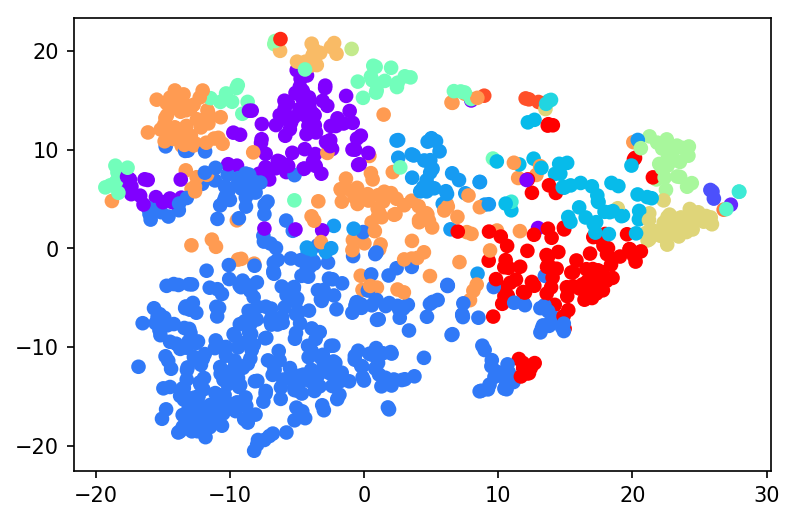

In [90]:
km = KMeans(n_clusters=20)
clusts = km.fit_predict(lsa_cv_articles_data)

tsne_lsa_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_lsa_cv_ft = tsne.fit_transform(lsa_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_lsa_cv_ft[:, 0], tsne_lsa_cv_ft[:, 1], c=clusts, cmap=plt.cm.rainbow);
#plt.scatter(tsne_lsa_cv_ft[:,0], tsne_lsa_cv_ft[:,1], c=lsa_cv_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.555298
[t-SNE] Computed conditional probabilities in 0.060s
[t-SNE] Iteration 50: error = 62.8020706, gradient norm = 0.2110270 (50 iterations in 2.329s)
[t-SNE] Iteration 100: error = 62.2441673, gradient norm = 0.2041364 (50 iterations in 2.312s)
[t-SNE] Iteration 150: error = 62.1555977, gradient norm = 0.2021159 (50 iterations in 2.311s)
[t-SNE] Iteration 200: error = 62.2004089, gradient norm = 0.2182129 (50 iterations in 2.463s)
[t-SNE] Iteration 250: error = 62.1665688, gradient norm = 0.2096387 (50 iterations in 2.688s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.166569
[t-SNE] Iteration 300: error = 0.9067373, gradient norm = 0.0007677 (50 iterations in 2.097s)
[t-SNE] Iteration 350: error = 0.8614483, gradient norm = 0.0002

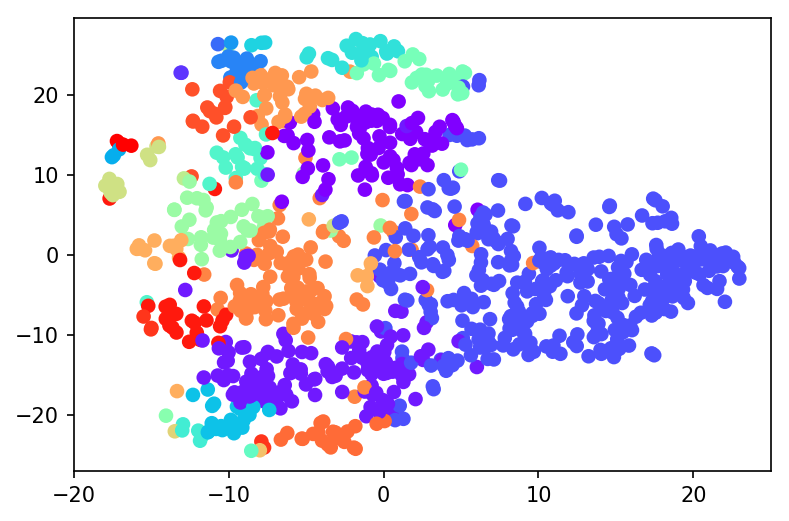

In [91]:
km = KMeans(n_clusters=30)
clusts = km.fit_predict(lsa_cv_articles_data)

tsne_lsa_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_lsa_cv_ft = tsne.fit_transform(lsa_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_lsa_cv_ft[:, 0], tsne_lsa_cv_ft[:, 1], c=clusts, cmap=plt.cm.rainbow);
#plt.scatter(tsne_lsa_cv_ft[:,0], tsne_lsa_cv_ft[:,1], c=lsa_cv_articles_data[:,1], cmap=plt.cm.rainbow)

### TSNE: LSA TFIDF

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.109188
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 63.7844162, gradient norm = 0.2266098 (50 iterations in 2.395s)
[t-SNE] Iteration 100: error = 62.9421082, gradient norm = 0.2093115 (50 iterations in 2.354s)
[t-SNE] Iteration 150: error = 62.7658768, gradient norm = 0.2101021 (50 iterations in 2.207s)
[t-SNE] Iteration 200: error = 62.8828583, gradient norm = 0.2316407 (50 iterations in 2.333s)
[t-SNE] Iteration 250: error = 62.5906143, gradient norm = 0.2119272 (50 iterations in 2.101s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.590614
[t-SNE] Iteration 300: error = 0.9346677, gradient norm = 0.0010393 (50 iterations in 1.822s)
[t-SNE] Iteration 350: error = 0.8895575, gradient norm = 0.0002

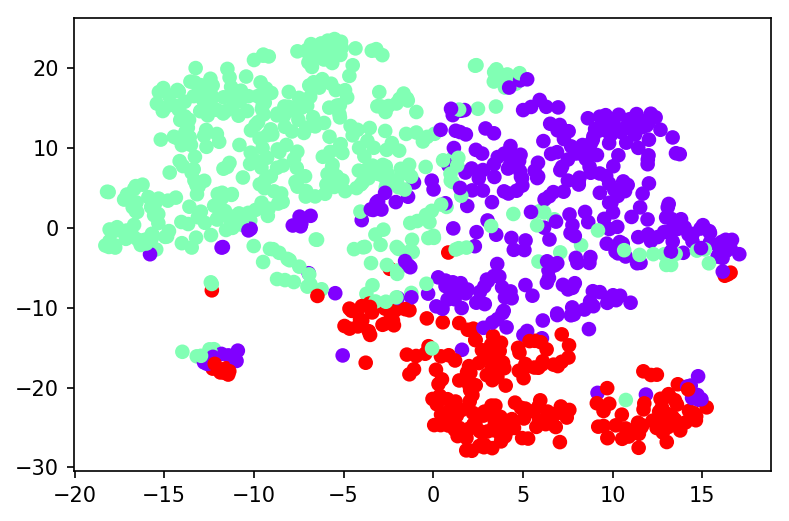

In [104]:
km = KMeans(n_clusters=3)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.109188
[t-SNE] Computed conditional probabilities in 0.067s
[t-SNE] Iteration 50: error = 63.8414268, gradient norm = 0.2211010 (50 iterations in 3.047s)
[t-SNE] Iteration 100: error = 62.8501167, gradient norm = 0.2160901 (50 iterations in 2.849s)
[t-SNE] Iteration 150: error = 62.8571625, gradient norm = 0.2187784 (50 iterations in 2.590s)
[t-SNE] Iteration 200: error = 62.8282776, gradient norm = 0.2175194 (50 iterations in 2.390s)
[t-SNE] Iteration 250: error = 62.8576622, gradient norm = 0.2279700 (50 iterations in 2.685s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.857662
[t-SNE] Iteration 300: error = 1.0101020, gradient norm = 0.0012397 (50 iterations in 1.969s)
[t-SNE] Iteration 350: error = 0.9555838, gradient norm = 0.0004

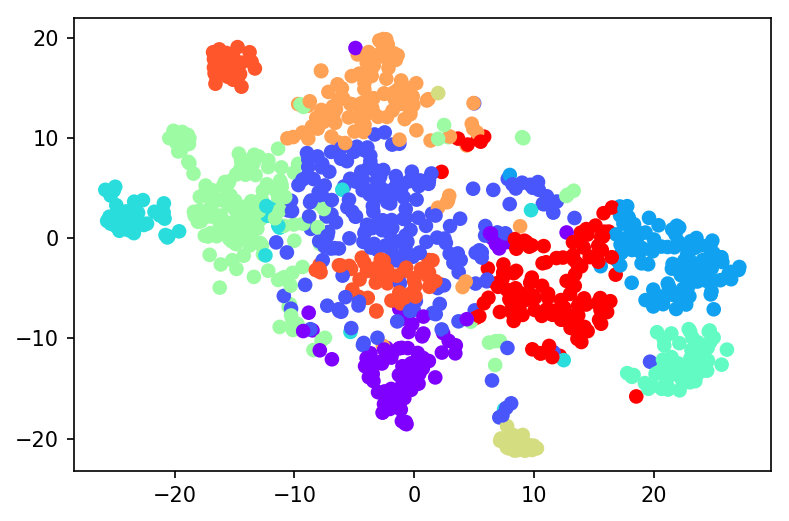

In [105]:
km = KMeans(n_clusters=10)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.061s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.109188
[t-SNE] Computed conditional probabilities in 0.077s
[t-SNE] Iteration 50: error = 64.0380325, gradient norm = 0.2135202 (50 iterations in 2.503s)
[t-SNE] Iteration 100: error = 62.7673264, gradient norm = 0.2164119 (50 iterations in 2.254s)
[t-SNE] Iteration 150: error = 62.6287880, gradient norm = 0.2213302 (50 iterations in 2.345s)
[t-SNE] Iteration 200: error = 63.0411148, gradient norm = 0.2142835 (50 iterations in 2.360s)
[t-SNE] Iteration 250: error = 63.1946831, gradient norm = 0.2206725 (50 iterations in 2.580s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.194683
[t-SNE] Iteration 300: error = 0.9742823, gradient norm = 0.0008811 (50 iterations in 2.135s)
[t-SNE] Iteration 350: error = 0.9278298, gradient norm = 0.0002

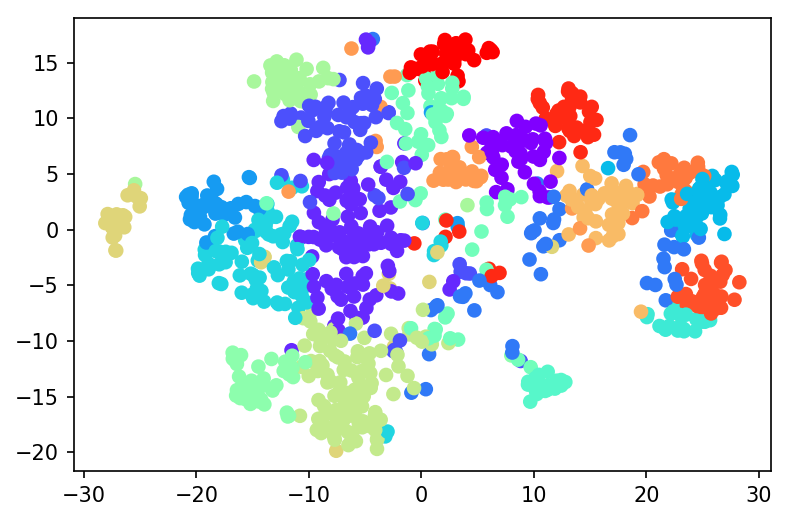

In [93]:
km = KMeans(n_clusters=20)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.109188
[t-SNE] Computed conditional probabilities in 0.140s
[t-SNE] Iteration 50: error = 64.2335434, gradient norm = 0.2163680 (50 iterations in 2.545s)
[t-SNE] Iteration 100: error = 63.1178284, gradient norm = 0.2078371 (50 iterations in 2.432s)
[t-SNE] Iteration 150: error = 63.0065155, gradient norm = 0.2165248 (50 iterations in 2.360s)
[t-SNE] Iteration 200: error = 62.8999939, gradient norm = 0.2351661 (50 iterations in 2.345s)
[t-SNE] Iteration 250: error = 62.7860985, gradient norm = 0.2255090 (50 iterations in 2.281s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.786098
[t-SNE] Iteration 300: error = 0.9388387, gradient norm = 0.0010613 (50 iterations in 1.935s)
[t-SNE] Iteration 350: error = 0.8905392, gradient norm = 0.0002

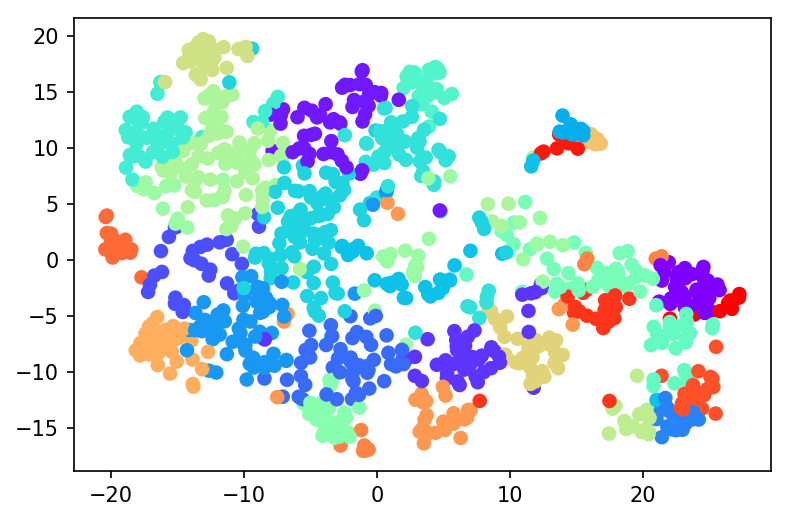

In [94]:
km = KMeans(n_clusters=30)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.061s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.109188
[t-SNE] Computed conditional probabilities in 0.075s
[t-SNE] Iteration 50: error = 64.1429825, gradient norm = 0.2220881 (50 iterations in 2.975s)
[t-SNE] Iteration 100: error = 62.8952141, gradient norm = 0.2117485 (50 iterations in 3.261s)
[t-SNE] Iteration 150: error = 62.9167252, gradient norm = 0.2131502 (50 iterations in 2.332s)
[t-SNE] Iteration 200: error = 62.6550522, gradient norm = 0.2227597 (50 iterations in 2.484s)
[t-SNE] Iteration 250: error = 63.0144386, gradient norm = 0.2162237 (50 iterations in 2.305s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.014439
[t-SNE] Iteration 300: error = 0.9568921, gradient norm = 0.0009150 (50 iterations in 2.015s)
[t-SNE] Iteration 350: error = 0.9102077, gradient norm = 0.0003

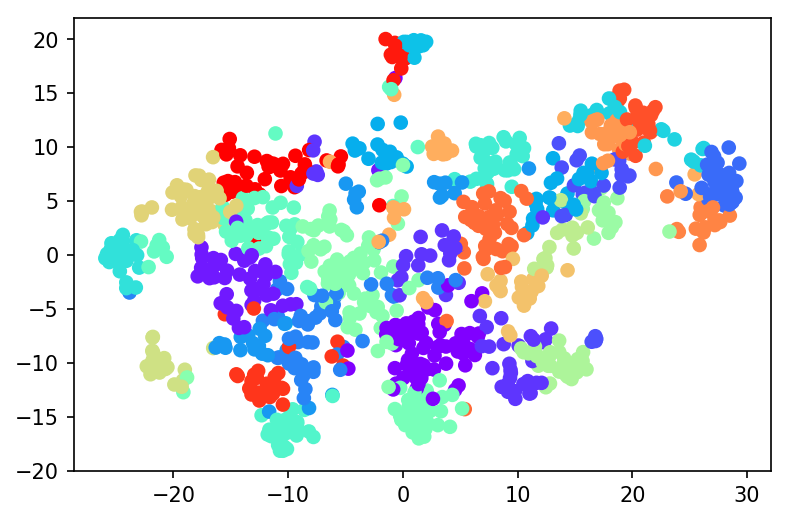

In [98]:
km = KMeans(n_clusters=30)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=10, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.109188
[t-SNE] Computed conditional probabilities in 0.086s
[t-SNE] Iteration 50: error = 63.4845276, gradient norm = 0.2194514 (50 iterations in 2.807s)
[t-SNE] Iteration 100: error = 62.9451828, gradient norm = 0.2320691 (50 iterations in 2.376s)
[t-SNE] Iteration 150: error = 62.7923584, gradient norm = 0.2230268 (50 iterations in 2.292s)
[t-SNE] Iteration 200: error = 62.9574966, gradient norm = 0.2079438 (50 iterations in 2.305s)
[t-SNE] Iteration 250: error = 63.1541824, gradient norm = 0.2297099 (50 iterations in 2.887s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.154182
[t-SNE] Iteration 300: error = 1.0075833, gradient norm = 0.0013732 (50 iterations in 2.912s)
[t-SNE] Iteration 350: error = 0.9454344, gradient norm = 0.0004

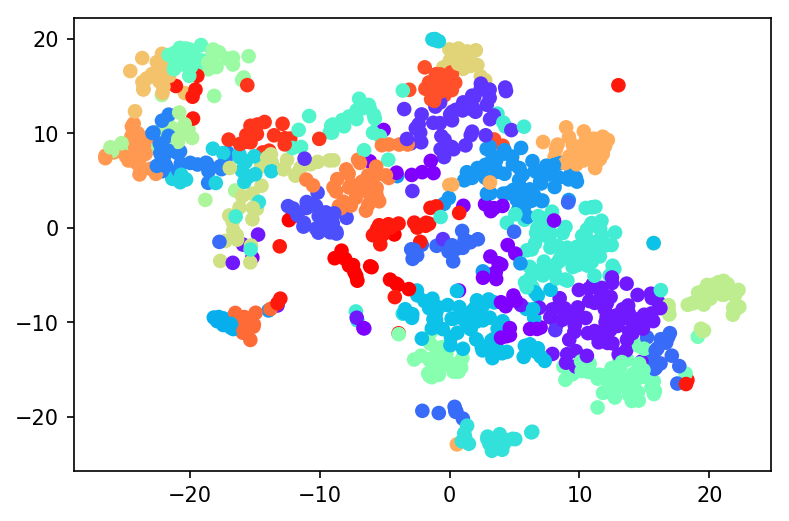

In [99]:
km = KMeans(n_clusters=30)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=20, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.109188
[t-SNE] Computed conditional probabilities in 0.075s
[t-SNE] Iteration 50: error = 63.3635254, gradient norm = 0.2222678 (50 iterations in 2.501s)
[t-SNE] Iteration 100: error = 62.8910942, gradient norm = 0.2202791 (50 iterations in 2.480s)
[t-SNE] Iteration 150: error = 62.6607475, gradient norm = 0.2200968 (50 iterations in 2.427s)
[t-SNE] Iteration 200: error = 62.6249313, gradient norm = 0.2161769 (50 iterations in 2.334s)
[t-SNE] Iteration 250: error = 62.7503128, gradient norm = 0.2189696 (50 iterations in 2.280s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.750313
[t-SNE] Iteration 300: error = 0.9990618, gradient norm = 0.0008226 (50 iterations in 2.066s)
[t-SNE] Iteration 350: error = 0.9371807, gradient norm = 0.0003

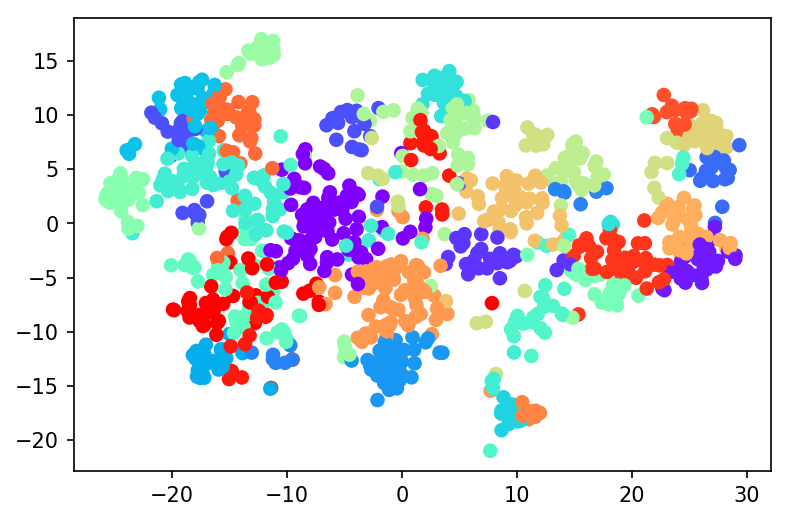

In [100]:
km = KMeans(n_clusters=30)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.109188
[t-SNE] Computed conditional probabilities in 0.068s
[t-SNE] Iteration 50: error = 63.5188141, gradient norm = 0.2330790 (50 iterations in 2.304s)
[t-SNE] Iteration 100: error = 62.7844810, gradient norm = 0.2191410 (50 iterations in 2.213s)
[t-SNE] Iteration 150: error = 62.6565018, gradient norm = 0.2302122 (50 iterations in 2.189s)
[t-SNE] Iteration 200: error = 62.8529129, gradient norm = 0.2159819 (50 iterations in 2.502s)
[t-SNE] Iteration 250: error = 62.9367332, gradient norm = 0.2247665 (50 iterations in 2.447s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.936733
[t-SNE] Iteration 300: error = 1.0169779, gradient norm = 0.0014729 (50 iterations in 2.134s)
[t-SNE] Iteration 350: error = 0.9449342, gradient norm = 0.0005

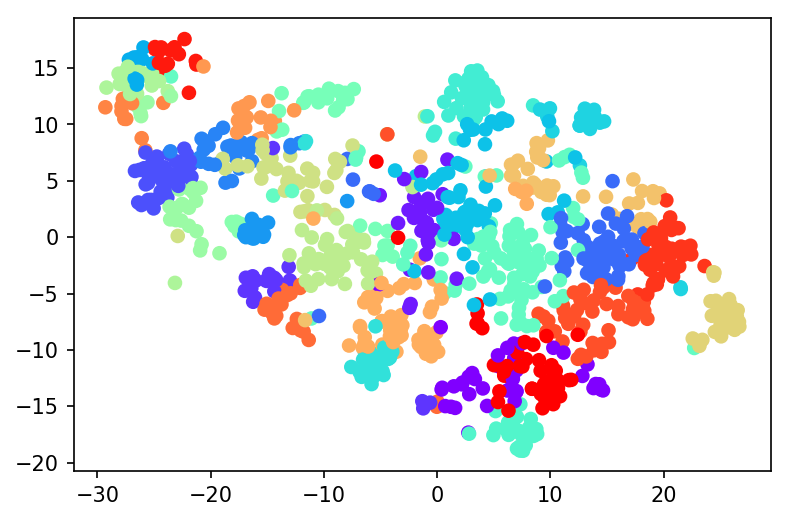

In [101]:
km = KMeans(n_clusters=30)
clusts2 = km.fit_predict(lsa_tfidf_articles_data)

tsne_tfidf_cv = TSNE(n_components=2, verbose=2, perplexity=50, n_iter=400)
tsne_tfidf_cv_ft = tsne.fit_transform(lsa_tfidf_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_tfidf_cv_ft[:, 0], tsne_tfidf_cv_ft[:, 1], c=clusts2, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_tfidf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

### TSNE: NMF CV

In [ ]:
km = KMeans(n_clusters=3)
clusts3 = km.fit_predict(nmf_cv_articles_data)

tsne_nmf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_nmf_cv_ft = tsne.fit_transform(nmf_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_nmf_cv_ft[:, 0], tsne_nmf_cv_ft[:, 1], c=clusts3, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_nmf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.115327
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 62.9464493, gradient norm = 0.1878570 (50 iterations in 3.045s)
[t-SNE] Iteration 100: error = 63.0786285, gradient norm = 0.1848759 (50 iterations in 3.216s)
[t-SNE] Iteration 150: error = 62.7425995, gradient norm = 0.1883276 (50 iterations in 2.629s)
[t-SNE] Iteration 200: error = 62.7008362, gradient norm = 0.1784547 (50 iterations in 2.343s)
[t-SNE] Iteration 250: error = 62.7003326, gradient norm = 0.2010715 (50 iterations in 2.175s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.700333
[t-SNE] Iteration 300: error = 0.8359175, gradient norm = 0.0009180 (50 iterations in 1.998s)
[t-SNE] Iteration 350: error = 0.7921841, gradient norm = 0.0002

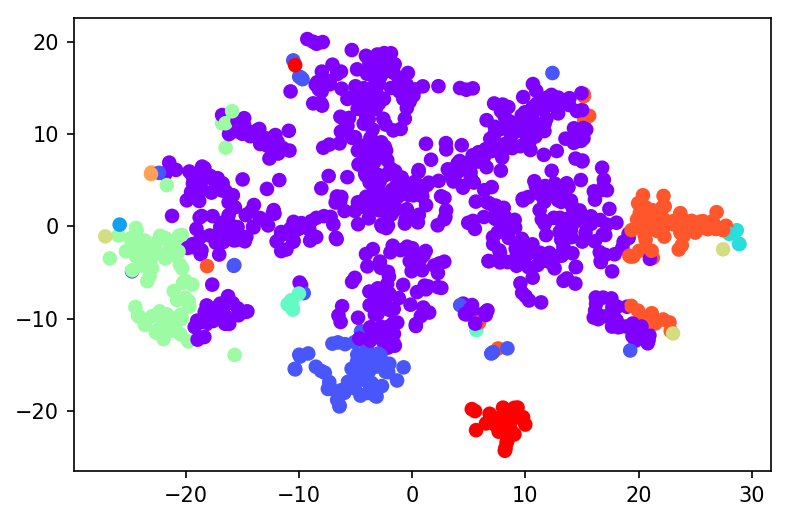

In [95]:
km = KMeans(n_clusters=10)
clusts3 = km.fit_predict(nmf_cv_articles_data)

tsne_nmf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_nmf_cv_ft = tsne.fit_transform(nmf_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_nmf_cv_ft[:, 0], tsne_nmf_cv_ft[:, 1], c=clusts3, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_nmf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.087s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.115327
[t-SNE] Computed conditional probabilities in 0.245s
[t-SNE] Iteration 50: error = 62.7652130, gradient norm = 0.1847617 (50 iterations in 3.933s)
[t-SNE] Iteration 100: error = 62.7827454, gradient norm = 0.1960016 (50 iterations in 2.457s)
[t-SNE] Iteration 150: error = 62.8322182, gradient norm = 0.1921199 (50 iterations in 2.587s)
[t-SNE] Iteration 200: error = 62.9391136, gradient norm = 0.1833926 (50 iterations in 2.386s)
[t-SNE] Iteration 250: error = 62.7984238, gradient norm = 0.1988906 (50 iterations in 2.453s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.798424
[t-SNE] Iteration 300: error = 0.7734252, gradient norm = 0.0007061 (50 iterations in 2.218s)
[t-SNE] Iteration 350: error = 0.7314203, gradient norm = 0.0002

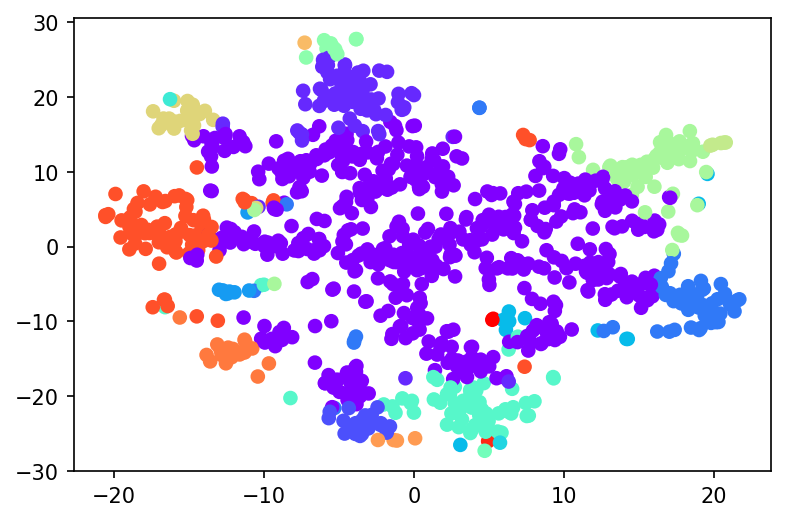

In [96]:
km = KMeans(n_clusters=20)
clusts3 = km.fit_predict(nmf_cv_articles_data)

tsne_nmf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_nmf_cv_ft = tsne.fit_transform(nmf_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_nmf_cv_ft[:, 0], tsne_nmf_cv_ft[:, 1], c=clusts3, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_nmf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.061s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.115327
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 62.7611504, gradient norm = 0.1826808 (50 iterations in 2.730s)
[t-SNE] Iteration 100: error = 62.7788239, gradient norm = 0.1958810 (50 iterations in 2.799s)
[t-SNE] Iteration 150: error = 62.8157272, gradient norm = 0.1870552 (50 iterations in 2.799s)
[t-SNE] Iteration 200: error = 62.9887581, gradient norm = 0.2049923 (50 iterations in 3.730s)
[t-SNE] Iteration 250: error = 62.7751007, gradient norm = 0.1983869 (50 iterations in 3.326s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.775101
[t-SNE] Iteration 300: error = 0.7670014, gradient norm = 0.0007288 (50 iterations in 2.182s)
[t-SNE] Iteration 350: error = 0.7258719, gradient norm = 0.0002

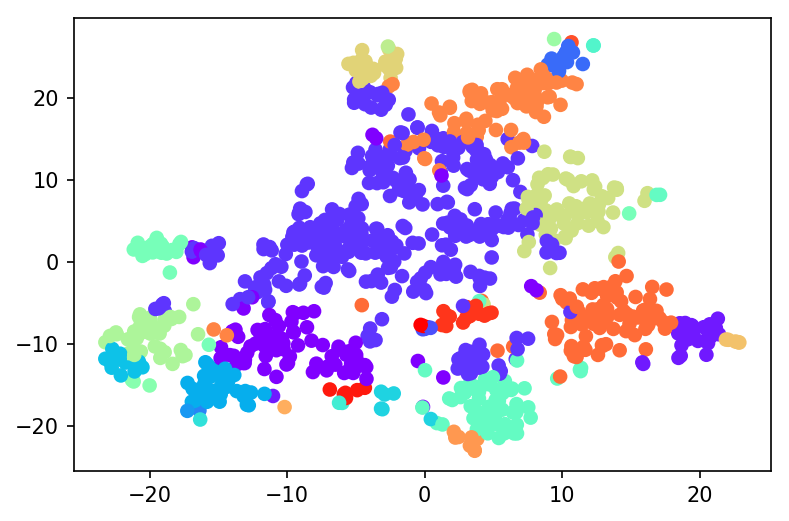

In [97]:
km = KMeans(n_clusters=30)
clusts3 = km.fit_predict(nmf_cv_articles_data)

tsne_nmf_cv = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=400)
tsne_nmf_cv_ft = tsne.fit_transform(nmf_cv_articles_data)

plt.figure(dpi=150)
plt.scatter(tsne_nmf_cv_ft[:, 0], tsne_nmf_cv_ft[:, 1], c=clusts3, cmap=plt.cm.rainbow);
#plt.scatter(tsne_tfidf_cv_ft[:,0], tsne_nmf_cv_ft[:,1], c=lsa_tfidf_articles_data[:,1], cmap=plt.cm.rainbow)

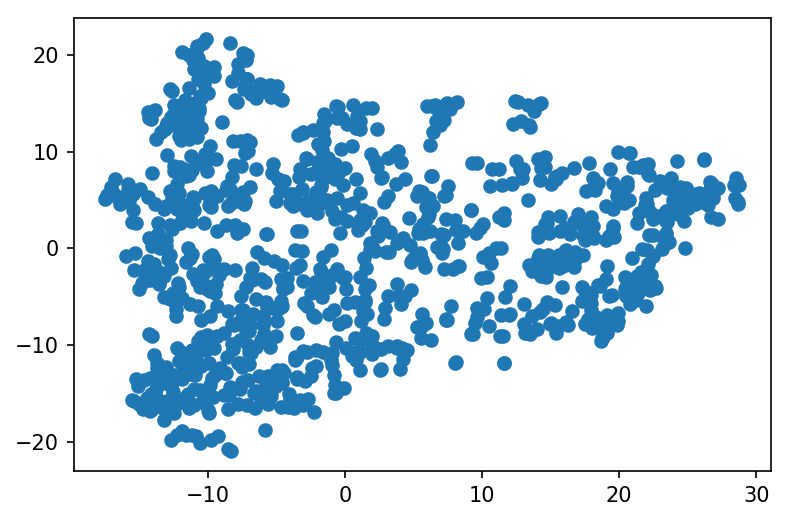

In [57]:
plt.figure(dpi=150)
plt.scatter(tsne_pos[:, 0], tsne_pos[:, 1], cmap=plt.cm.rainbow);

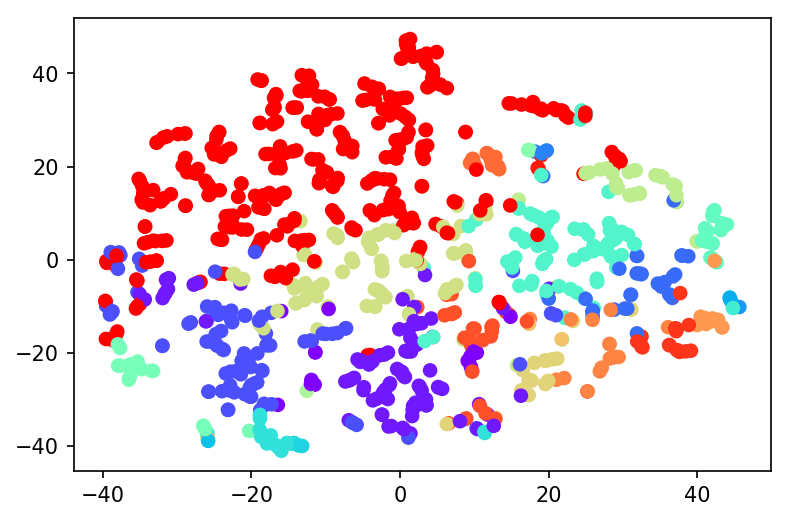

In [51]:
plt.figure(dpi=150)
plt.scatter(tsne_pos[:, 0], tsne_pos[:, 1], c=clusts, cmap=plt.cm.rainbow);

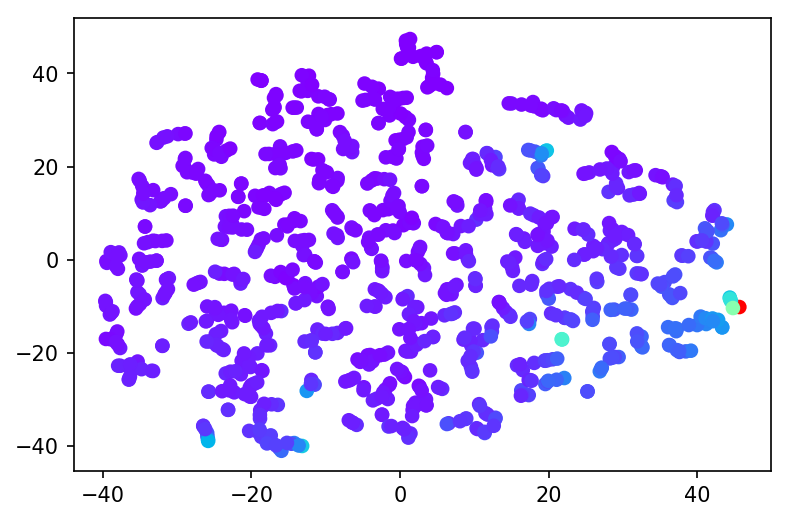

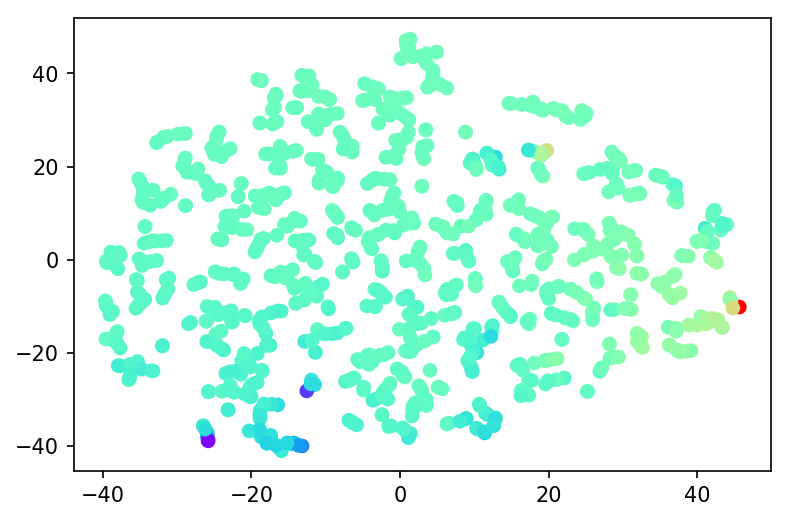

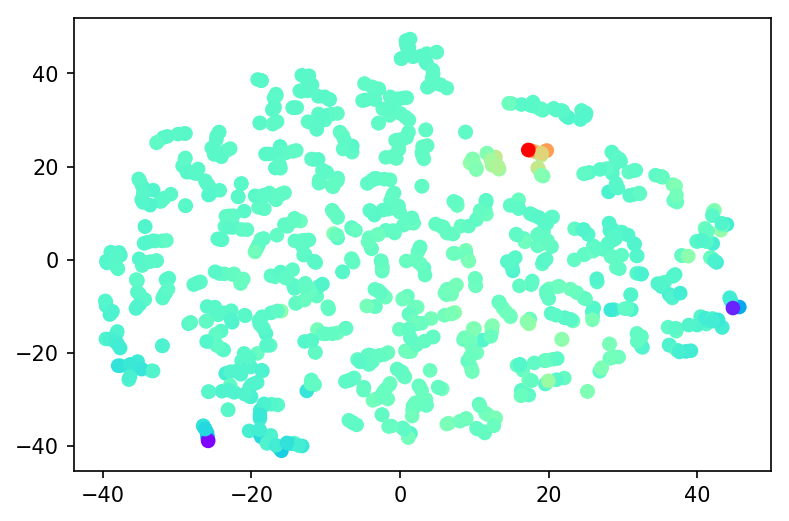

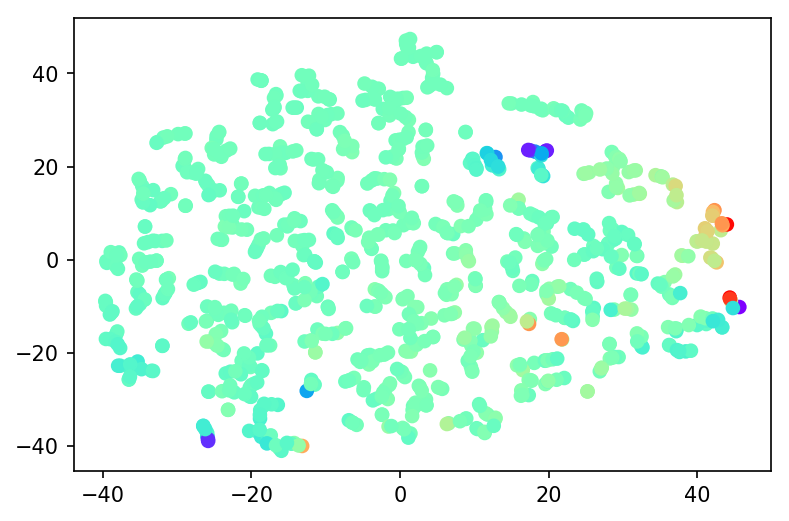

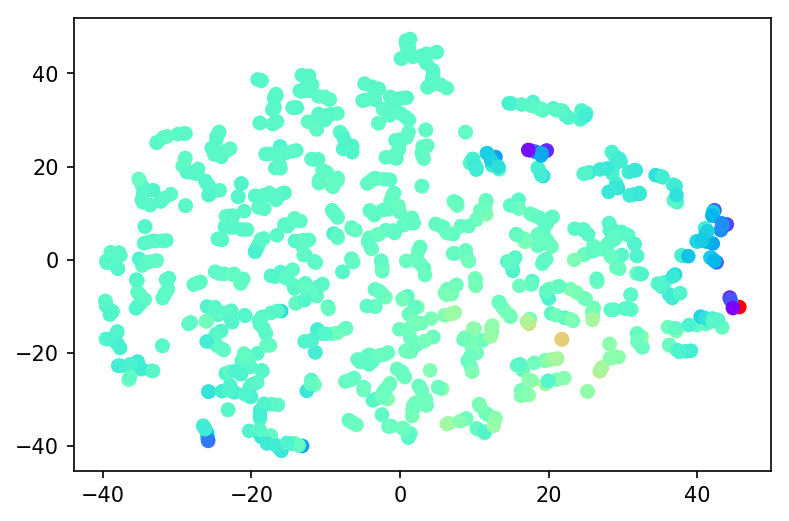

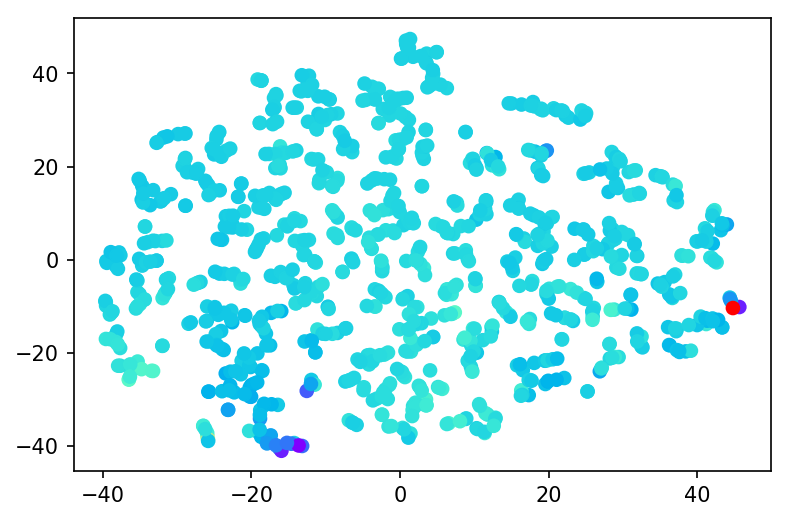

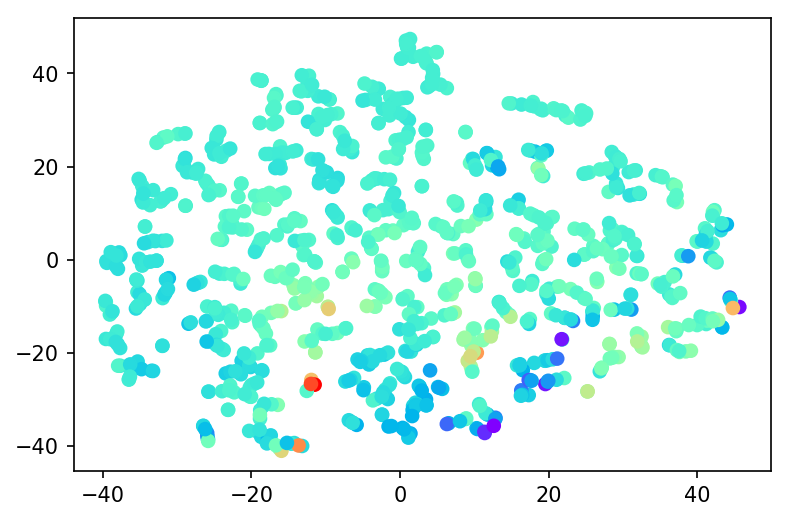

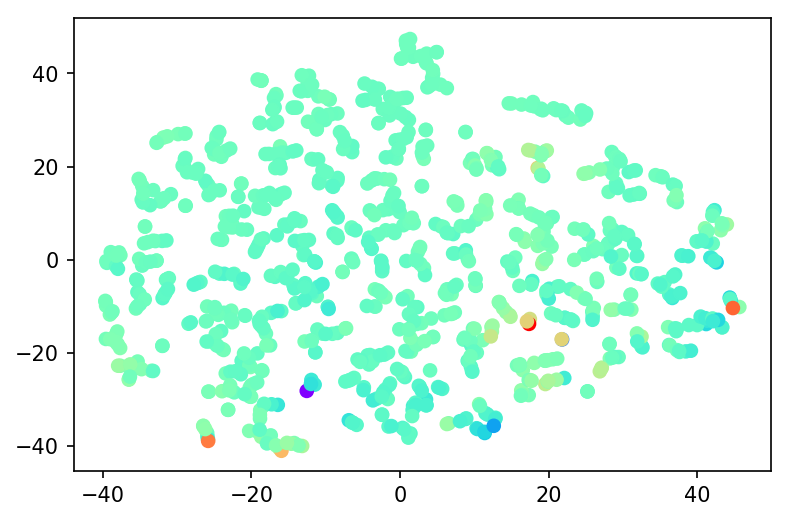

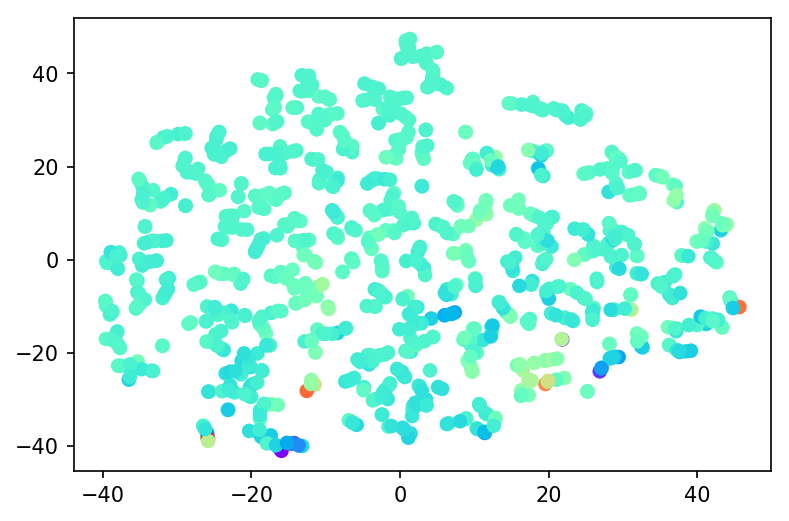

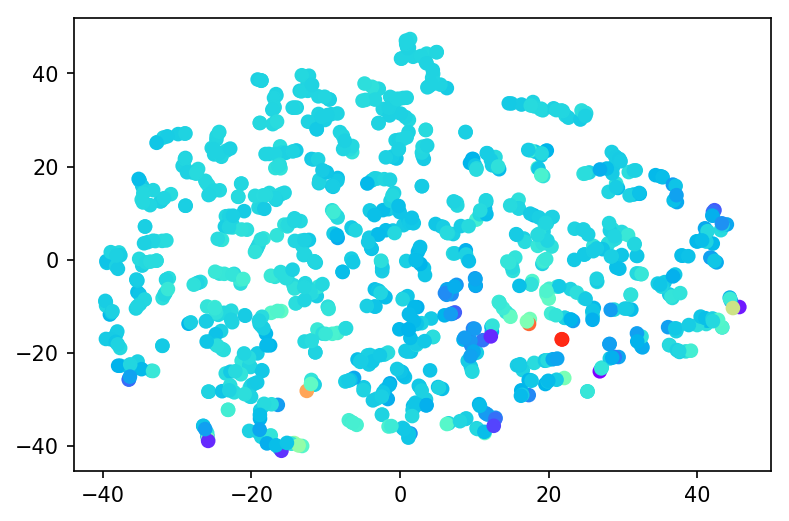

In [54]:
for i in range(10):
    plt.figure(dpi=150)
    plt.scatter(tsne_pos[:,0],tsne_pos[:,1], c=lsa_cv_articles_data[:,i], cmap=plt.cm.rainbow)

In [53]:
lsa_cv_articles_data.shape

(1000, 10)

In [102]:
from sklearn.metrics import silhouette_score

SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(lsa_tfidf_articles_data)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(lsa_tfidf_articles_data, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

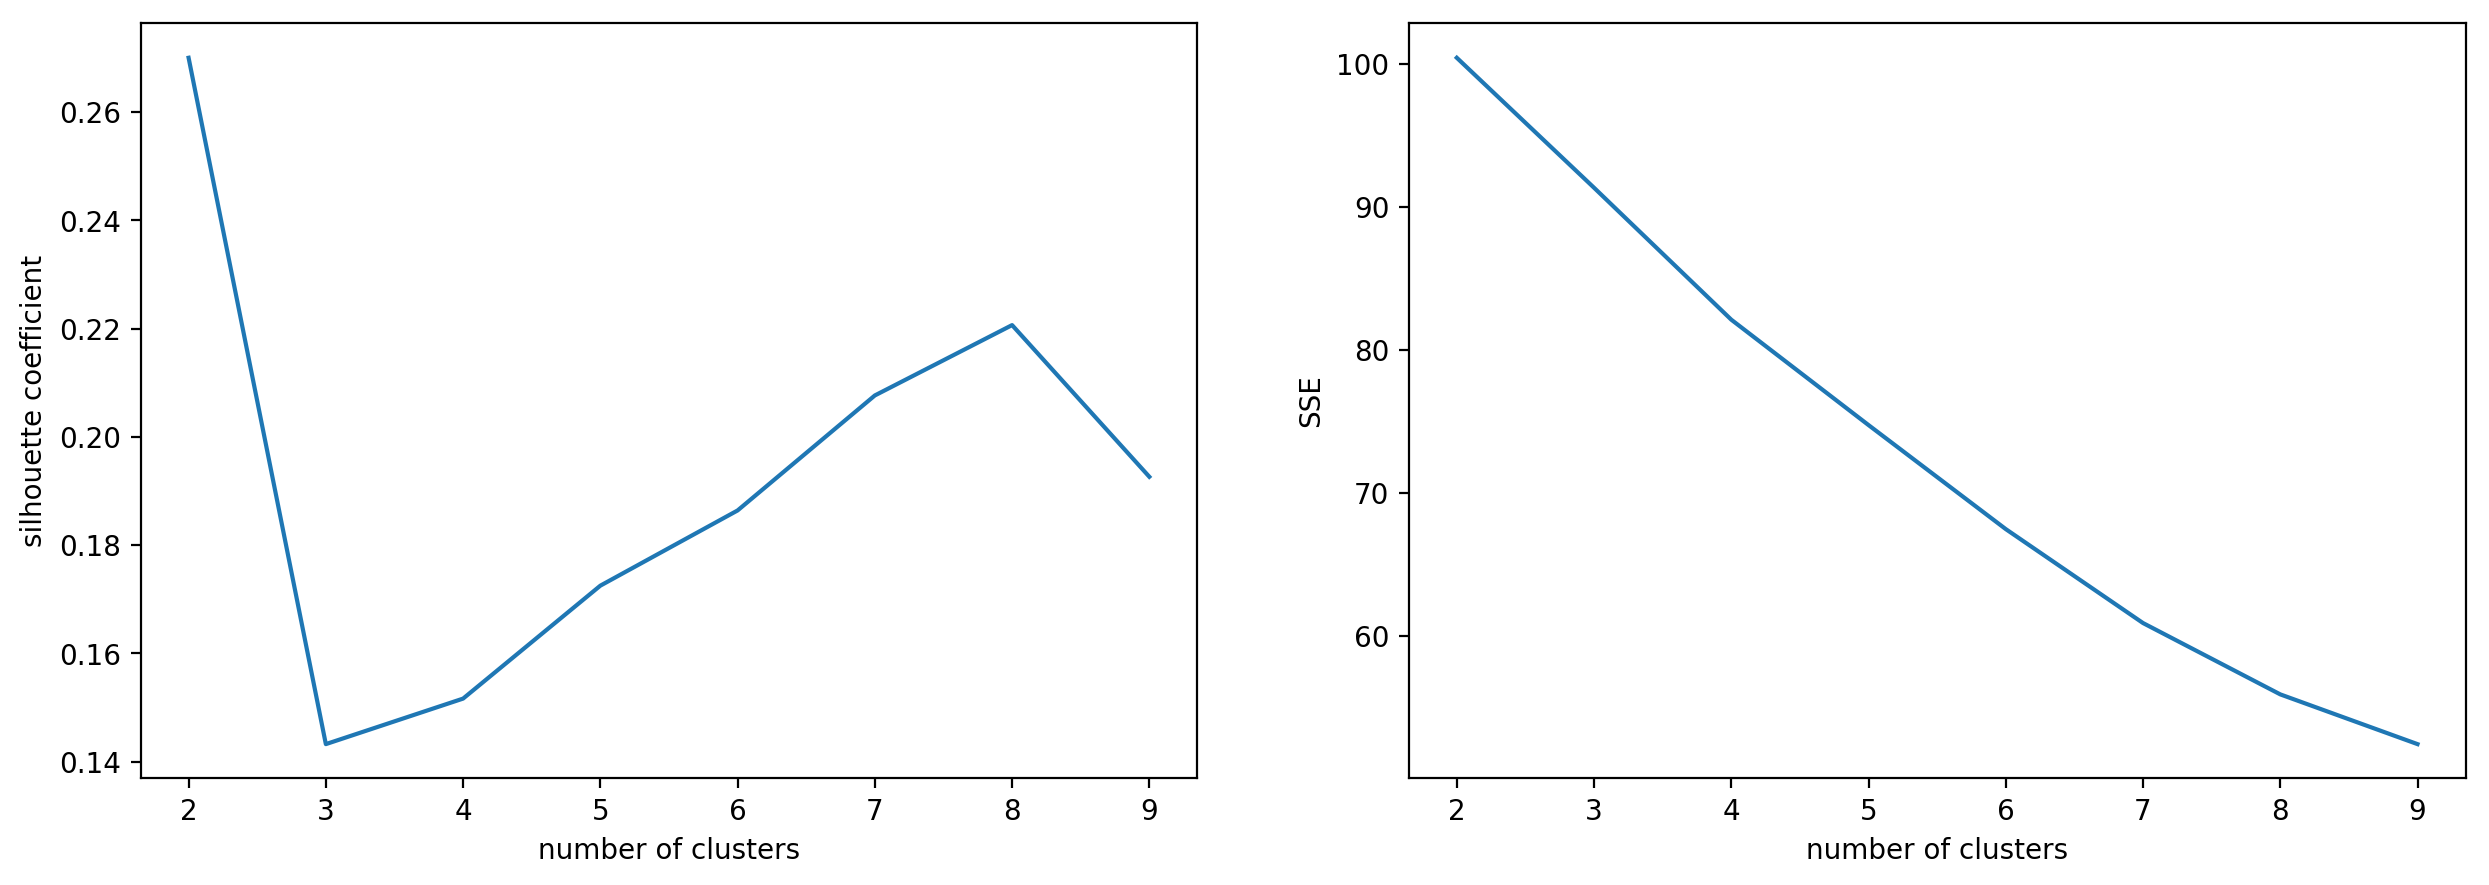

In [103]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');